# Report Comparaison WISe TDR



## Import Libraries

In [1]:
# ================ IMPORTATIONS ================ #

### DATA MANIPULATION ###

import pandas as pd # used to manipulate 2D data into the data-frame

import numpy as np # useful to handle matrix like datasets

import seaborn as sns # useful for statistics

### DATA REPRESENTATION ###

import matplotlib.pyplot as plt # used for makings nice plots

print("Good you've imported the necessary libraries.")

### PERSONAL SCRIPT ###

import sys
import os

# Ajoute le dossier parent du notebook au sys.path
sys.path.append(os.path.abspath("../.."))  # Monte d'un niveau

from scripts.Comput import BM_permitivity



Good you've imported the necessary libraries.


In [2]:
## Open file with xarray

In [3]:
# Folder where all the mesears are stack
data_folder = "~/private-storage/Experiences/Comparison_TDR_WISe/processed_data/"

# Creat a data frame with all measures.
file_name = "CR1000_TDR_06032025.csv"
df_TDR_06032025 = pd.read_csv(data_folder+file_name, delimiter=',')

file_name = "CR1000_TDR_10032025.csv"
df_TDR_10032025 = pd.read_csv(data_folder+file_name, delimiter=',')

file_name_2 = "CR1000_TDR_stabilite_T.csv"
df_TDR_stabT = pd.read_csv(data_folder+file_name_2, delimiter=',')

# del the duplicate :

## Comput permittivity from Period PA µs 


TDR send a electromagnetic pulse and mesure the time of return. From that it deduce the permittivity:


The speed of an electromagnetic wave in a medium is given by:
$$ c =  \frac{ c_{0}}{\sqrt{\epsilon*\mu}}$$

where $c_0$ is the speed of light in a vacuum, $ϵ$ is the permittivity we are looking for, and $μ$ is the magnetic permeability (which is equal to 1 in snow and air).

In all cases, the time of flight in snow is related to that in air by:
$$ t = t_{air}\sqrt{\epsilon/\epsilon_0}$$

Where, $\epsilon_0$ is permittivity of the air equal to 1

Finnaly :

$$\epsilon = \epsilon_0*(t/t_{air})^2$$
$$\epsilon = (\frac{tc_0}{d})^2$$

With $d = 2.L$ where L ~ 12cm

We proceed in two step:
* Set the calibration, Find L
* Compute permittivity

### Find the real Length : L

$$ L = \sqrt[]{\epsilon_{air}}(\frac{t_{air}.c_0}{2}) $$ 

In [4]:
# Control of L:

c0 = 3e8   # Speed of light in vacuum (m/s)

L = df_TDR_06032025.PA_1_Avg_air*1e-9*c0/2
#df['P_bm'] = (df[name_PA] * 1e-9 * c0 / (2 * L)) ** 2
L = pd.concat([L,df_TDR_06032025.PA_1_Avg_air*1e-9*c0/2])

print( 'True Length', 'Mean :',L.mean(), 'STD :' ,L.std() ) 

True Length Mean : 0.162075 STD : 0.00048500234301213465


L seam to be 16.4 cm

### Comput permittivity
$$\epsilon = \epsilon_{air}*(t/t_{air})^2$$

In [5]:
# Comput permittivity without calibration 
L =L.mean()

df_TDR_06032025['P_bm'] = 1*(df_TDR_06032025['PA_1_Avg'] / df_TDR_06032025['PA_1_Avg_air'])**2
df_TDR_10032025['P_bm'] = 1*(df_TDR_10032025['PA_1_Avg'] / df_TDR_10032025['PA_1_Avg_air'])**2

df_TDR_06032025['P_bm_L'] = (df_TDR_06032025['PA_1_Avg'] * 1e-9 * c0 / (2 * L)) ** 2
df_TDR_10032025['P_bm_L'] = (df_TDR_10032025['PA_1_Avg'] * 1e-9 * c0 / (2 * L)) ** 2

df_TDR_10032025

,TIMESTAMP,RECORD,EC_1_Avg,T_1_Avg,P_1_Avg,PA_1_Avg,VR_1_Avg,PA_1_Avg_air,WISE_1,WISE_2,WISE_3,P_bm,P_bm_L
0,2025-03-10 14:47:00,200,0.000,5.921,1.520,1.122,1.000,1.086,2.629,2.834,2.700,1.067397,1.078291
1,2025-03-10 14:55:00,208,0.001,4.234,2.033,1.150,1.001,1.080,2.633,2.724,2.823,1.133831,1.132781
2,2025-03-10 15:02:00,215,0.001,4.619,2.033,1.150,1.001,1.083,3.071,3.034,2.947,1.127558,1.132781
3,2025-03-10 15:19:00,232,0.001,7.905,1.263,1.108,1.001,1.080,2.540,2.846,2.238,1.052524,1.051550
4,2025-03-10 15:28:00,241,0.001,3.738,1.732,1.134,1.001,1.079,2.493,2.917,2.575,1.104545,1.101480
5,2025-03-10 15:41:00,254,0.001,3.330,2.498,1.173,1.001,1.109,2.763,2.828,2.863,1.118750,1.178546
6,2025-03-10 15:47:00,260,0.001,4.570,2.290,1.163,1.001,1.081,2.955,2.876,2.825,1.157465,1.158537
7,2025-03-10 15:55:00,268,0.001,3.689,2.297,1.163,1.001,1.078,3.118,3.091,3.116,1.163917,1.158537
8,2025-03-10 16:06:00,279,0.001,3.943,2.206,1.158,1.001,1.080,3.129,3.138,3.222,1.149660,1.148597
9,2025-03-10 16:13:00,286,0.001,2.990,2.653,1.181,1.001,1.082,3.215,3.194,3.105,1.191366,1.194676


## Results and report

### First day of mesuring 06/03/2025: 


* **Day** : 06/03/2025
* **Who** : G.PITIOT
* **Snow Type** : Melt Form 
* **Grain size** : >2mm
    
---
Comments :
        
Je note que les première mesures sont dépendantes ed la qualité de placement de la TDR. Les dernières mesures la neige est mieux replacer autour du TDR et est tassé.
A noter aussi que la WISe sans utilisaion reste chaude, la première mesure de wise semble donc montrer de plus grande permittivité.
Pour le prochain jour, je m'attacherai à ecarter la première mesure de WISe et à répéter la mesure deux fois de WISe pour s'affrenchir légérement de la variabilité spacial de prise de mesure dans la glacière

---
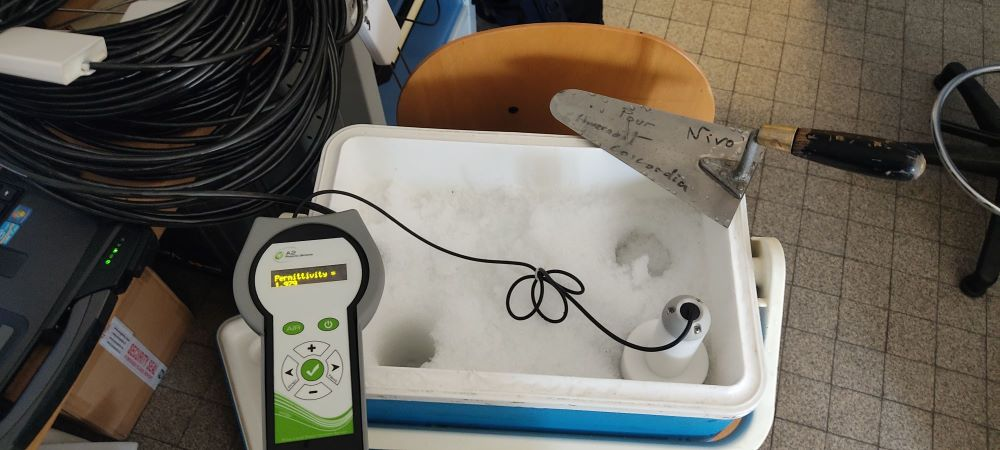                     


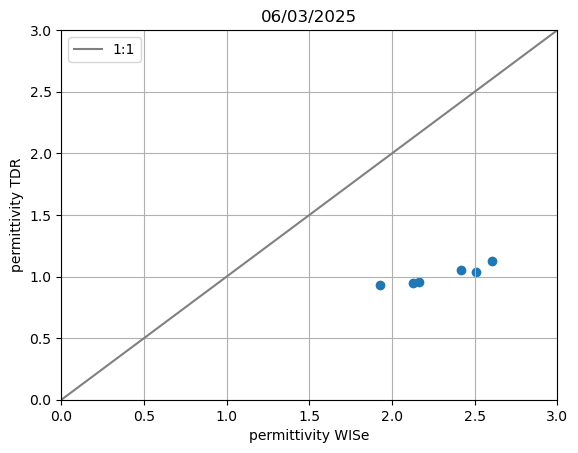

In [6]:
plt.figure()

# Plot data
plt.scatter(df_TDR_06032025['WISE'],df_TDR_06032025['P_bm'])

# Plot of the  1:1 ligne
plt.plot([0,5], [0,5],color='grey',label='1:1')

# Ajout des labels et titre
plt.legend()
plt.xlim(0,3)
plt.ylim(0,3)
plt.xlabel('permittivity WISe')
plt.title('06/03/2025')
plt.ylabel('permittivity TDR')
plt.grid()

## Second day of manipualtion 10/03/2025:


* **Day** : 10/03/2025
* **Who** : G.PITIOT
* **Snow Type** : Melt Form 
* **Grain size** : >2mm

    
Causé par une panne de chambre froide la neige était déja humide quand j'ai commmencé à manipuler.

Les commentaires de manipulation sont ceux-ci pour chaque record number :
* 191 : mise en température de la sonde longue, ce qui peut à terme affecter la prise de mesure WISe, la surface étant plus sujette au réchauffement
* 232 : CHANGEMENT DE NEIGE, gros grains + aglomérat très fort impactant fortement la varibilité spatiale de la sonde ( non homogénité du milieu + positionnement de la sonde difficile)
* 268 : Neige de plus en plus homogène causé par la fonte

Cette expérience en appelle d'autres avec une neige plus homogène pour gagner en confiance sur les petites valeurs de LWC

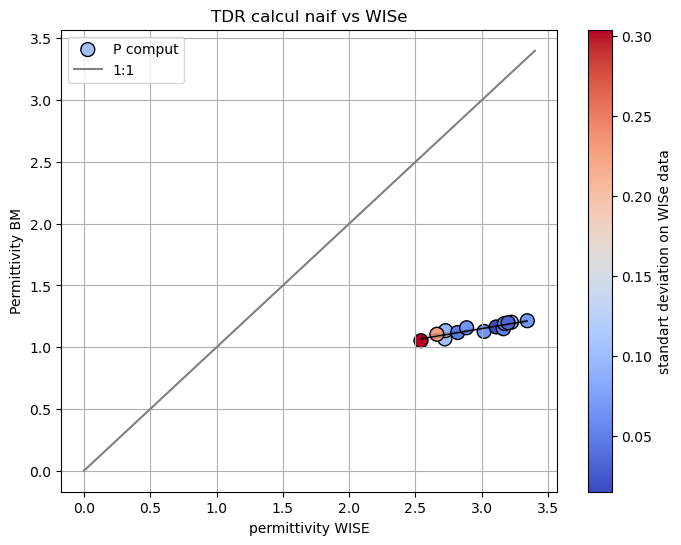

In [7]:
# Mean of permittivity WISe 
df_TDR_10032025['WISE_Avg'] = df_TDR_10032025[['WISE_1','WISE_2','WISE_3']].mean(axis=1)
df_TDR_10032025['WISE_Std'] = df_TDR_10032025[['WISE_1','WISE_2','WISE_3']].std(axis=1)

# Plot
plt.figure(figsize=(8, 6))
# Plot des Point WISe et TDR
scatter = plt.scatter(df_TDR_10032025['WISE_Avg'], df_TDR_10032025['P_bm'], c=df_TDR_10032025['WISE_Std'], cmap='coolwarm', s=100, edgecolors='k', label='P comput')

# Ajout d'une régréssion linéaire
sns.regplot(x=df_TDR_10032025['WISE_Avg'], y=df_TDR_10032025['P_bm'], scatter=False, color='black', line_kws={'linewidth': 1})

# Ajout d'une barre de couleur
cbar = plt.colorbar(scatter)
cbar.set_label("standart deviation on WISe data")

# Plot of the  1:1 ligne
plt.plot([0,3.4], [0,3.4],color='grey',label='1:1')

# Ajout des labels et titre
#plt.xlim(1.5,3.4)
#plt.ylim(1.5,3.4)
plt.xlabel("permittivity WISE")
plt.ylabel("Permittivity BM")
plt.legend()
plt.title("TDR calcul naif vs WISe")
plt.grid(True)

## Concatanate exp

In [8]:
## Final report:

df_TDR_10032025 = df_TDR_10032025.rename(columns={'WISE_Avg': 'WISE'})

df_TDR = pd.concat([df_TDR_06032025, df_TDR_10032025], axis=0)
#df_TDR

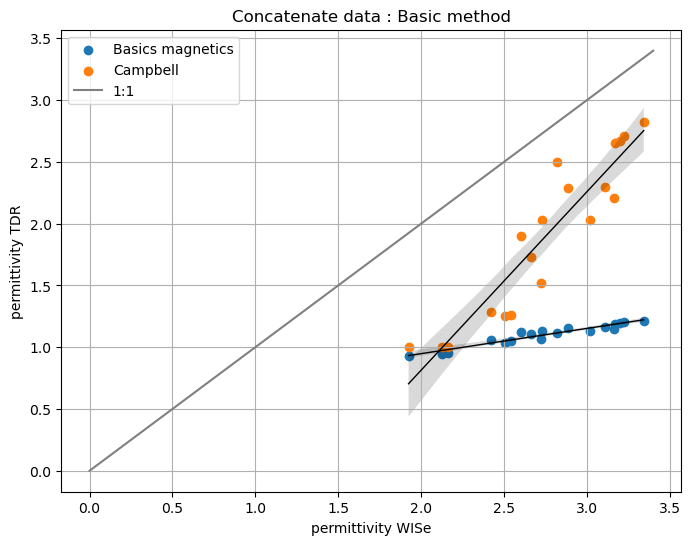

In [9]:
# PLOT ####################################################################################################################
plt.figure(figsize=(8, 6))

# Basics magnetics ########################################################################################################

#Plot 06/03/2025
plt.scatter(df_TDR['WISE'],df_TDR['P_bm'],label='Basics magnetics')
# Régréssion:
sns.regplot(x=df_TDR['WISE'], y=df_TDR['P_bm'], scatter=False, color='black', line_kws={'linewidth': 1})


# Permittivty from Cambell ################################################################################################
plt.scatter(df_TDR['WISE'],df_TDR['P_1_Avg'],label='Campbell')
# Régréssion:
sns.regplot(x=df_TDR['WISE'], y=df_TDR['P_1_Avg'], scatter=False, color='black', line_kws={'linewidth': 1})

# Plot of the  1:1 ligne #################################################################################################
plt.plot([0,3.4], [0,3.4],color='grey',label='1:1')

# Ajout des labels et titre

plt.legend()
plt.xlabel('permittivity WISe')
plt.ylabel('permittivity TDR')
plt.title("Concatenate data : Basic method")
plt.grid()